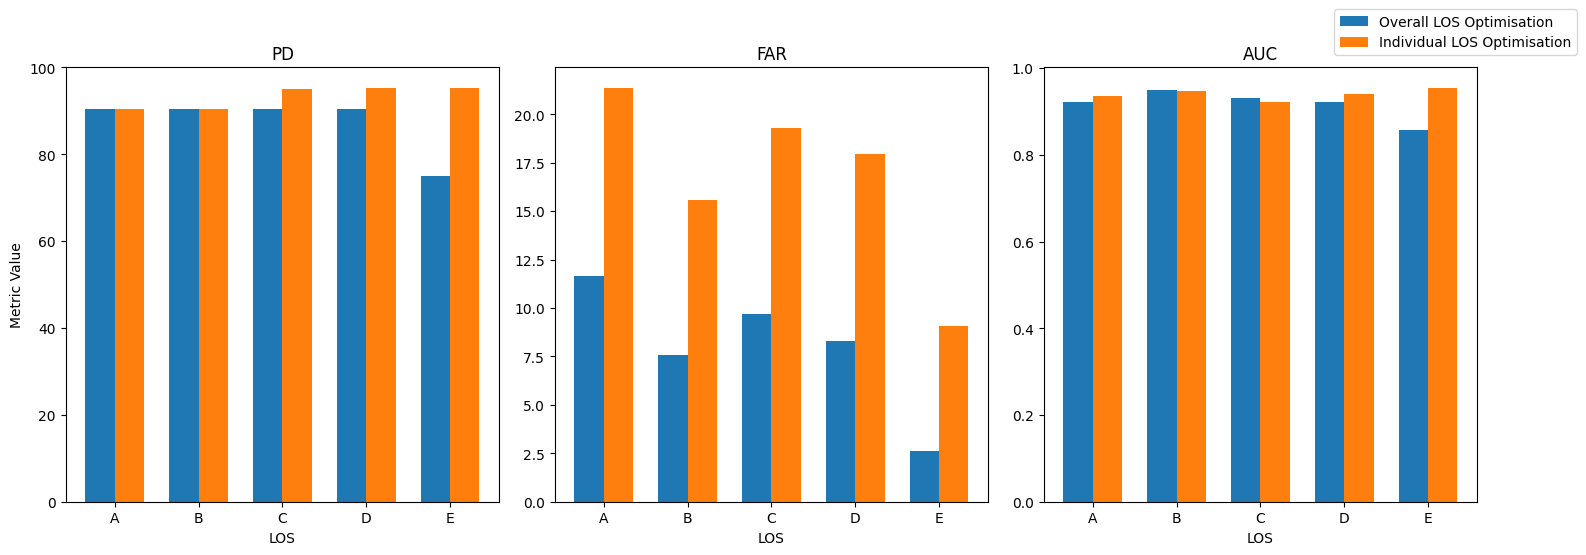

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File names
before_file = "dist_median_metrics_Jerk.csv"
after_file = "each_median_metrics_Jerk.csv"

# Load CSVs
before_df = pd.read_csv(before_file)
after_df = pd.read_csv(after_file)

# LOS categories
LOS_list = ['A', 'B', 'C', 'D', 'E']

# Metrics to compare
metrics = ['PD', 'FAR', 'AUC']

# Plot setup
fig, axes = plt.subplots(1, len(metrics), figsize=(16,6), sharey=False)
# fig.suptitle("Metrics with Overall and Individual LOS optimisation for 70mph ", fontsize=16)

for j, metric in enumerate(metrics):
    # Calculate mean values for each LOS and metric
    before_vals = [before_df.loc[before_df['LOS'] == los, metric].dropna().mean() for los in LOS_list]
    after_vals = [after_df.loc[after_df['LOS'] == los, metric].dropna().mean() for los in LOS_list]

    x = np.arange(len(LOS_list))  # label positions
    width = 0.35

    ax = axes[j]
    bars1 = ax.bar(x - width/2, before_vals, width, label='Overall LOS Optimisation')
    bars2 = ax.bar(x + width/2, after_vals, width, label='Individual LOS Optimisation')

    ax.set_title(metric)
    ax.set_xticks(x)
    ax.set_xticklabels(LOS_list)
    ax.set_xlabel("LOS")
    if j == 0:
        ax.set_ylabel("Metric Value")
    if j == 2:
    # Legend slightly above the plot, aligned to top right
        ax.legend(loc="upper center", bbox_to_anchor=(0.95, 1.15))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("MetricsOpti70.png", dpi=300)
plt.show()
